In [140]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [141]:
def area_paracaidas(m,Cd,rho,v):
    g=9.806 #m/s
    return (2*g*m)/(rho*Cd*v**2)

def error_division(cte,x,y, e_x,e_y):
    return abs(cte*x/y)*(e_x/abs(x)+e_y/abs(y))

def ancho_Cruciforme(A,LWR):
    W=np.sqrt(A/(2*LWR-1))
    return W

def densidad_aire(h):
    # Definición de constantes
    rho_0 = 1.225  # kg/m^3
    g = 9.81  # m/s^2
    M = 0.02897  # kg/mol
    R = 8.3144598  # J/mol·K
    T0 = 288.15  # K

    rho = rho_0 * np.exp(-g * M * h / (R * T0))
    return rho

def Do(L,LWR):
    return 2*L/LWR*np.sqrt((2*LWR-1)/np.pi) # Poner la ecuacion en las notas

def diametro(A):
    return np.sqrt((4*A)/np.pi)

def b(L, a):
    b2 = (3*L - 2*np.pi*a + np.sqrt(3*L**2 + 6*np.pi*L*a - 5*np.pi**2*a**2)) / (3*np.pi)
    
    return b2

CD_LWR = lambda x: 2.75- 1.4*x + 0.34*x**2 -0.03*x**3

In [154]:
print(densidad_aire(0))

1.225


In [142]:
g=9.806 # m/s
m=45 #+-5 Kg
rho=1.225 #kg/m^3
Cd1= .73 # +-0.1 Cruciform LWR=3.5
Dp_Do=0.69 #
Cd2 = 0.775 # +-0.175 Circular 
v1=10 # m/s o menor
v2=20.45 # m/s
a1=2*g/(rho*v1**2)
a2=2*g/(rho*v2**2)

In [143]:
A1=area_paracaidas(m,CD_LWR(3),densidad_aire(500),v1) #área cruciforma LWD=3.2

error_A1=error_division(a1,m,CD_LWR(3),0.1,0.175)

A2=area_paracaidas(m,CD_LWR(3.4),densidad_aire(500),v1) #área cruciforma LWD=3.5
error_A2=error_division(a1,m,CD_LWR(3.4),0.1,0.175)

A3=area_paracaidas(m,CD_LWR(3.8),densidad_aire(500),v1) #área cruciforma LWD=3.8
error_A3=error_division(a1,m,CD_LWR(3.8),0.1,0.175)

AS=area_paracaidas(m,Cd2,rho,v2) #área semielipse
error_AS=error_division(a2,m,Cd2,0.1,0.175)

print(densidad_aire(500))

1.1544567636145164


In [144]:
print(A1)

9.555793120792517


In [145]:
#np.sqrt(Total) # Lado de un solo pliego pero no es lo que se necesita

In [146]:
#Definición de tabla para visualización

df = pd.DataFrame()

areas=[A1,A2,A3,AS]
Diametro=np.array([diametro(A1), diametro(A2), diametro(A3), diametro(AS)])
errores=[error_A1,error_A2,error_A3, error_AS]
ratio=[error_A1/A1,error_A2/A2,error_A3/A3,error_AS/AS]
Cd=[CD_LWR(3),CD_LWR(3.4),CD_LWR(3.8),Cd2]
W = 1.19*Diametro*np.array([1/3,1/3.4,1/3.8,1 ])

df['LwR']=[3, 3.4, 3.8, 'NA']
df['Cd'] = Cd
#df['So'] = areas
df['Do']=Diametro
df['Dc=L'] = 1.19*Diametro
df['W']=W
df['Dp'] = 0.711*Diametro
#df['h']=[b(3*W[0],0.711*Diametro[0]/2), b(3.4*W[1],0.711*Diametro[1]/2), b(3.8*W[2],0.711*Diametro[2]/2), b(W[3],0.711*Diametro[3]/2)]
#df['h'] = np.sqrt((1-0.711**2)*(Diametro**2)/4)
#df['Error']=errores
#df['Relación']=ratio
print(df)


   LwR       Cd        Do      Dc=L         W        Dp
0    3  0.80000  3.488096  4.150834  1.383611  2.480036
1  3.4  0.74128  3.623617  4.312104  1.268266  2.576392
2  3.8  0.69344  3.746528  4.458368  1.173255  2.663781
3   NA  0.77500  1.682326  2.001967  2.001967  1.196133


In [147]:
df

,LwR,Cd,Do,Dc=L,W,Dp
0,3,0.80000,3.488096,4.150834,1.383611,2.480036
1,3.4,0.74128,3.623617,4.312104,1.268266,2.576392
2,3.8,0.69344,3.746528,4.458368,1.173255,2.663781
3,NA,0.77500,1.682326,2.001967,2.001967,1.196133


## Medidas de paracaidas de pruebas 3D

In [148]:
df = pd.DataFrame()


Cd=[CD_LWR(3),CD_LWR(3.4),CD_LWR(3.8),Cd2]
Dp = (0.711/(1.19))*15*np.array([3,3.4,3.8,1 ])
h = [b(3*15,Dp[0]/2), b(3.4*15,Dp[1]/2), b(3.8*15,Dp[2]/2), b(15,Dp[3]/2)]
df['Dc=L']= 15*np.array([3,3.4,3.8,1 ])
df['W']=np.array([15,15,15,15])

df['Dp'] = Dp
df['h'] = h

print(df)

   Dc=L   W         Dp          h
0  45.0  15  26.886555  15.178312
1  51.0  15  30.471429  17.202087
2  57.0  15  34.056303  19.225862
3  15.0  15   8.962185   5.059437


In [149]:
df

,Dc=L,W,Dp,h
0,45.0,15,26.886555,15.178312
1,51.0,15,30.471429,17.202087
2,57.0,15,34.056303,19.225862
3,15.0,15,8.962185,5.059437


## Geometria del cruciforme

In [150]:


LWR1=3
LWR2=3.4
LWR3=3.8
W=ancho_Cruciforme(A1, LWR1)
L=LWR1*W
print(L,W) # metros

4.147339824203767 1.3824466080679223


## Cruva del paracaidas

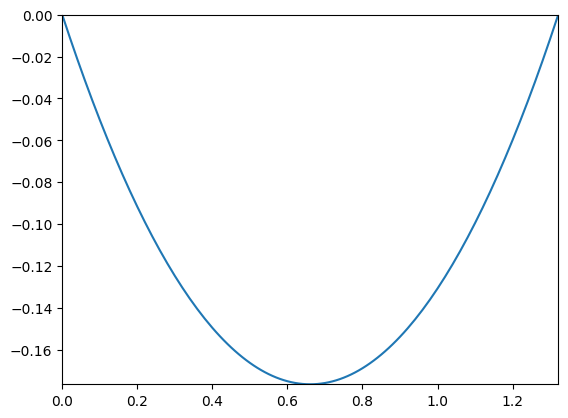

In [151]:
#def curva_paracaidas(A1,Theta,x):
W=ancho_Cruciforme(A1, LWR1)
L=LWR1*W

Fd=densidad_aire(500)*v1**2*CD_LWR(3.2)/2
dT=m*g/4*ancho_Cruciforme(A1, LWR1) #Tension
Theta= 3*np.pi/4+np.pi/8
T0=dT*np.cos(Theta)
Gamma=dT*1.01/(W*T0)
a=np.arcsinh(W/2*Gamma)/Gamma
h=(np.cosh(Gamma*a)-1)/Gamma
x=np.arange(0,2*a, .01)
y= (np.cosh(Gamma*(x-a))-np.cosh(Gamma*a))/Gamma
#    return y

plt.plot(x,-y)
plt.ylim(h,0)
plt.xlim(0,2*a)
plt.show()

In [152]:
print(2*a,2*a/W, W, h, Fd, dT)

1.3214898287638304 0.9559065941871825 1.3824466080679223 -0.1765849157987211 44.363464512178716 152.508053685533


In [153]:
len(x)

133